## Demo of using Ranking Loss (Contrastive and Triplet)

In [47]:
import torch
from torch.nn.modules import Conv2d, ReLU, BatchNorm2d, BatchNorm1d, Linear
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision.models.resnet import resnet18
from torchvision.models.vgg import vgg11
import torchvision.transforms as T
import matplotlib.pyplot as plt

### Data

In [17]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

In [18]:
trainset = datasets.MNIST("/datadrive-ssd/datasets/MNIST", train=True, download=True, transform=transforms)

In [28]:
train_loader = DataLoader(trainset, batch_size=16, shuffle=True)

In [29]:
a = next(iter(train_loader))

In [37]:
print(a[0].shape, a[1])

torch.Size([16, 1, 28, 28]) tensor([9, 8, 3, 7, 6, 1, 0, 2, 1, 0, 1, 8, 4, 4, 4, 5])


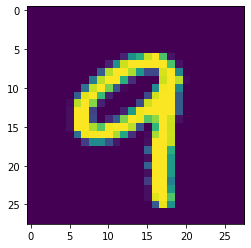

In [36]:
plt.imshow(a[0][0][0].numpy())

### Model

In [50]:
class Net(torch.nn.Module):
    def __init__(self):
        self.conv1a = Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1a = BatchNorm2d(16)
        self.relu1a = ReLU()
        self.conv1b = Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn1b = BatchNorm2d(16)
        self.relu1b = ReLU()
        self.conv1c = Conv2d(16, 32, kernel_size=3, padding=1, stride=2)
        self.bn1c = BatchNorm2d(32)
        self.relu1c = ReLU()
        self.conv2a = Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2a = BatchNorm2d(32)
        self.relu2a = ReLU()
        self.conv2b = Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2b = BatchNorm2d(32)
        self.relu2b = ReLU()
        self.conv2c = Conv2d(32, 64, kernel_size=3, padding=1, stride=2)
        self.bn2c = BatchNorm2d(64)
        self.relu2c = ReLU()
        self.fc1 = Linear(7 * 7 * 64, 2048)
        self.bn1 = BatchNorm1d(2048)
        self.relu1 = ReLU()
        self.fc2 = Linear(2048, 128)
        self.initialize_weights()
    
    def initialize_weights(self):
        pass
    
    def forward(self, x):
        x = self.relu1a(self.bn1a(self.conv1a(x)))
        x = self.relu1b(self.bn1b(self.conv1b(x)))
        x = self.relu1c(self.bn1c(self.conv1c(x)))
        x = self.relu2a(self.bn2a(self.conv2a(x)))
        x = self.relu2b(self.bn2b(self.conv2b(x)))
        x = self.relu2c(self.bn2c(self.conv2c(x)))
        x = x.view(16, 64, -1)
        x = self.relu1(self.bn1(self.fc1(x)))
        x = self.fc2(x)
        return x
